In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

In [ ]:

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
531147,Data Analyst,Pricing & Data Analyst,"Irving, TX",via ZipRecruiter,Full-time,False,"Texas, United States",2023-05-08 19:02:35,False,False,United States,year,60000.0,NaN,Corsicana Mattress Company,"[excel, word, power bi]","{'analyst_tools': ['excel', 'word', 'power bi']}"


<Axes: >

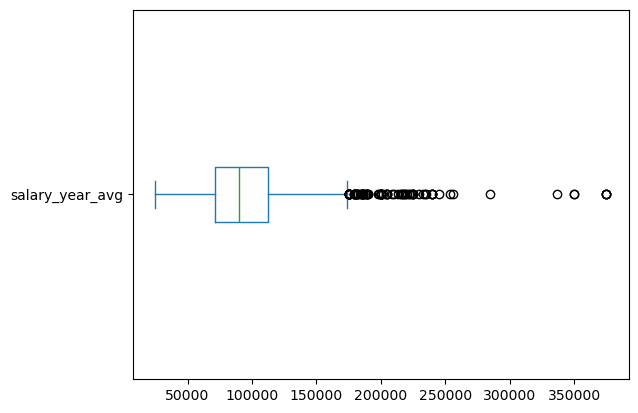

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)



C:\Users\fejle\AppData\Local\Temp\ipykernel_4332\285861762.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


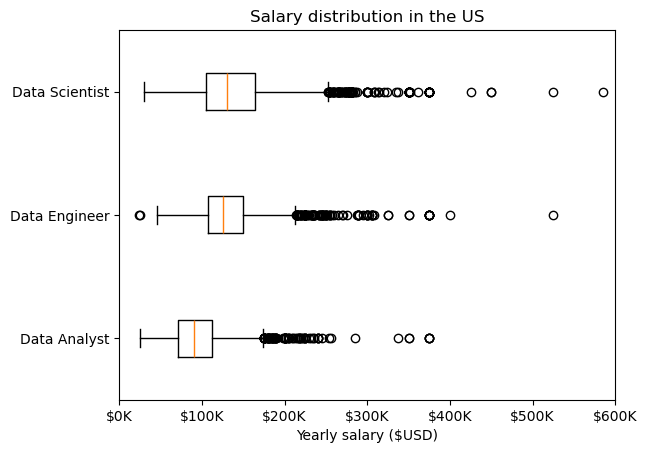

In [13]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']


df_US = df[df['job_title_short'].isin(job_titles) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary distribution in the US')
plt.xlabel('Yearly salary ($USD)')

ax = plt.gca()
ax.xaxis.set_major_formatter(lambda x,pos:f'${int(x/1000)}K')
plt.xlim(0,600000)

plt.show()